### K Means on 3D data

In [23]:
import numpy as np
import pandas as pd

In [24]:
from sklearn.datasets import make_blobs

centroids = [(-5, -5, 5), (5, 5, -5), (3.5,-2.5, 4), (-2.5, 2.5, -4)]
cluster_std = [1, 1, 1, 1]

X, y = make_blobs(n_samples=200, cluster_std=cluster_std, 
                  centers=centroids, n_features=3, random_state=1)

In [25]:
import plotly.express as px

In [26]:
fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2])
fig.show()

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [28]:
# Using Elbow method for finding optimal K
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, n_init='auto')
    km.fit_predict(X)
    wcss.append(km.inertia_)

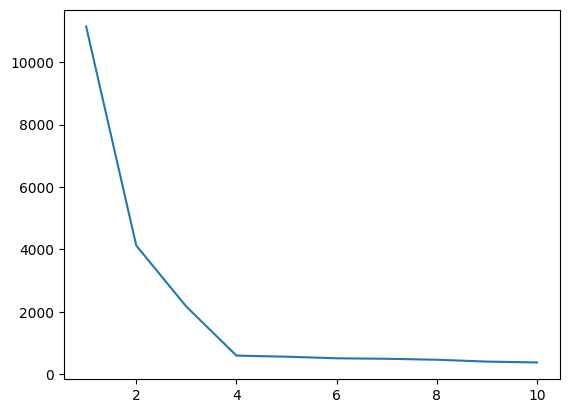

In [29]:
# Plot the Elbow Curve.
plt.plot(range(1,11), wcss)

We can see that after K = 4, the curve becomes almost straight, minimal changes occur. So K = 4 is the optimal. 
This also is obvious as we can see in the plot of data, there are clearly 4 clusters present

In [30]:
km = KMeans(n_clusters=4, n_init='auto')
y_pred = km.fit_predict(X)

In [32]:
# To store the data along with their corresponding cluster category 
# as labels or target lables of the dataset.
df = pd.DataFrame()

df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_pred

In [33]:
fig = px.scatter_3d(df, x='col1', y='col2', z='col3', color='label')
fig.show()